# Mínimos cuadrados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]

from scipy import optimize

Vamos a hacer mínimos cuadrados ajustando los datos a una parábola. Primero que todo se simularán las lecturas y se graficarán.

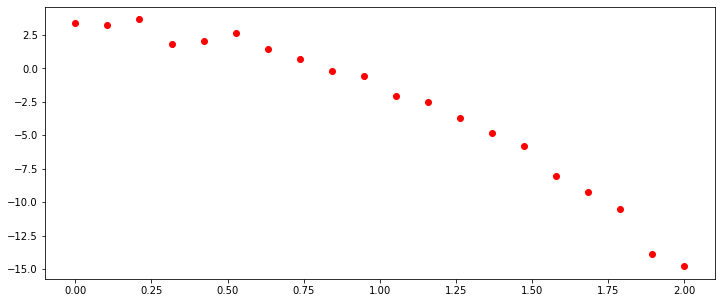

In [2]:
# se define el polinomio -5x^2 + x + 3 (que es la solución al problema)
coefEX = [-5, 1, 3]
f = np.poly1d(coefEX)

# se muestrean "m" datos del polinomio; se simula el error en la medición con un ruido gausiano
m = 20

xi = np.linspace(0, 2, m)
yi = f(xi) + 0.5*np.random.randn(m)

# se grafican los datos
plt.plot(xi, yi, 'or')
plt.show()

## Usando regresión lineal

In [3]:
# se arma la matriz A y se asigna el vector b
A = np.c_[xi**2, xi, np.ones(m)]
b = yi
A

array([[0.        , 0.        , 1.        ],
       [0.01108033, 0.10526316, 1.        ],
       [0.04432133, 0.21052632, 1.        ],
       [0.09972299, 0.31578947, 1.        ],
       [0.17728532, 0.42105263, 1.        ],
       [0.27700831, 0.52631579, 1.        ],
       [0.39889197, 0.63157895, 1.        ],
       [0.54293629, 0.73684211, 1.        ],
       [0.70914127, 0.84210526, 1.        ],
       [0.89750693, 0.94736842, 1.        ],
       [1.10803324, 1.05263158, 1.        ],
       [1.34072022, 1.15789474, 1.        ],
       [1.59556787, 1.26315789, 1.        ],
       [1.87257618, 1.36842105, 1.        ],
       [2.17174515, 1.47368421, 1.        ],
       [2.49307479, 1.57894737, 1.        ],
       [2.8365651 , 1.68421053, 1.        ],
       [3.20221607, 1.78947368, 1.        ],
       [3.5900277 , 1.89473684, 1.        ],
       [4.        , 2.        , 1.        ]])

Se calcula la pseudoinversa de Moore-Penrose $\mathbf{A}^\dagger$ usando dos diferentes métodos:

In [4]:
# método 1
Amp = np.linalg.inv(A.T @ A) @ A.T

# método 2
Amp2 = np.linalg.pinv(A)

# comparamos ambos métodos y observamos que las respuestas son prácticamente iguales
# np.all(np.isclose(Amp, Amp2))
np.max(np.abs(Amp - Amp2))

4.218847493575595e-15

Estimamos ahora los coeficientes del polinomio (con tres diferentes métodos) y observamos que son prácticamente los originales:

In [5]:
print('Los coeficientes originales son: ', coefEX)

#%timeit Amp @ b
coefEST = Amp @ b
coefEST

Los coeficientes originales son:  [-5, 1, 3]


array([-4.64240968,  0.33524887,  3.16744478])

In [6]:
print('Los coeficientes originales son: ', coefEX)

#%timeit np.linalg.lstsq(A, b, rcond=None)[0]
coefEST2 = np.linalg.lstsq(A, b, rcond=None)[0]
coefEST2

Los coeficientes originales son:  [-5, 1, 3]


array([-4.64240968,  0.33524887,  3.16744478])

In [7]:
print('Los coeficientes originales son: ', coefEX)

#%timeit np.polyfit(xi, yi, 2)
coefEST3 = np.polyfit(xi, yi, 2)
coefEST3

Los coeficientes originales son:  [-5, 1, 3]


array([-4.64240968,  0.33524887,  3.16744478])

Como ya se calcularon los coeficientes, procedemos a graficar la aproximación por mínimos cuadrados:

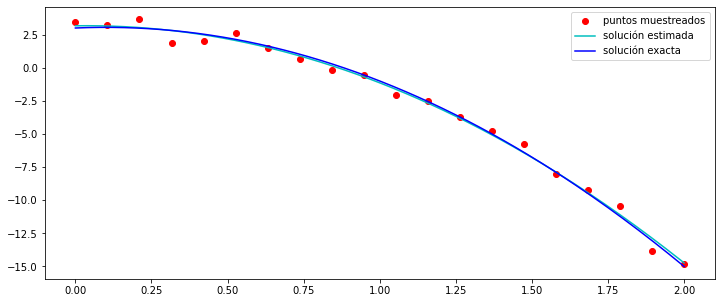

In [8]:
x = np.linspace(0, 2, 200)
y = np.polyval(coefEST, x)

plt.plot(xi, yi,  'or', label='puntos muestreados')
plt.plot(x, y,    'c-', label='solución estimada')
plt.plot(x, f(x), 'b-', label='solución exacta')
plt.legend()
plt.show()

## Usando una regresión no lineal

### Primero se define la función, el error y los coeficientes iniciales

Inicialmente, se define la función que deseamos ajustar en términos de los coeficientes desconocidos y una función de error:

In [9]:
def fun(x, a, b, c):
    return a*x**2 + b*x + c

def error(coef, x, y):
    return y - fun(x, *coef)

# valores iniciales de los coeficientes (para comenzar a realizar la minimización)
coef_ini = [1, 1, 1]

### Método 1: función optimize.leastsq()

In [10]:
print('Los coeficientes originales son: ', coefEX)

#%timeit optimize.leastsq(error, coef_ini, args=(x, y))
coefEST4, _ = optimize.leastsq(error, coef_ini, args=(xi, yi))
coefEST4

Los coeficientes originales son:  [-5, 1, 3]


array([-4.64240958,  0.33524865,  3.16744486])

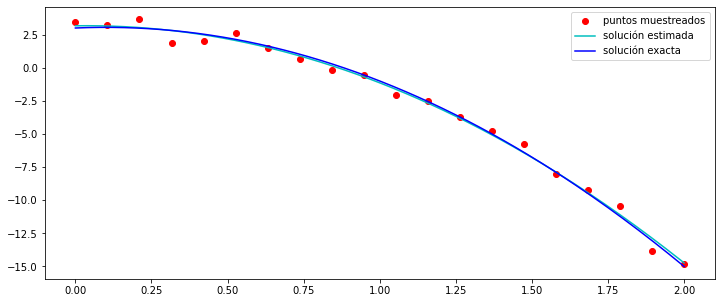

In [11]:
y = fun(x, *coefEST4)

plt.plot(xi, yi,  'or', label='puntos muestreados')
plt.plot(x, y,    'c-', label='solución estimada')
plt.plot(x, f(x), 'b-', label='solución exacta')
plt.legend()
plt.show()

### Método 2: función optimize.minimize()
En este caso se define una función de pérdida (que es MSE) y se minimiza dicha función:

In [12]:
print('Los coeficientes originales son: ', coefEX)

MSE = lambda p, x, y : sum(error(p, x, y)**2)

coefEST5 = optimize.minimize(MSE, coef_ini, method='L-BFGS-B', args=(xi, yi))
print(coefEST5.x)

Los coeficientes originales son:  [-5, 1, 3]
[-4.64246035  0.33535694  3.16738574]


### Método 3: función optimize.curve_fit()

In [13]:
print('Los coeficientes originales son: ', coefEX)

coefEST6, _ = optimize.curve_fit(fun, xi, yi, coef_ini)
coefEST6

Los coeficientes originales son:  [-5, 1, 3]


array([-4.64240962,  0.33524874,  3.16744483])